In [125]:
import numpy as np
import pandas as pd

In [126]:
athletes = pd.read_csv("./data/athlete_events.csv")
athletes.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [127]:
athletes.shape

(271116, 15)

In [128]:
athletes[athletes["Sex"] == "M"].shape

(196594, 15)

In [129]:
athletes[athletes["Sex"] == "F"].shape

(74522, 15)

In [130]:
athletes.columns

# 66 different sports
len(athletes["Sport"].unique())

66

In [131]:
print(sum(athletes["Height"].isna()))
print(sum(athletes["Weight"].isna()))

60171
62875


In [132]:
athletes_clean = athletes.dropna(subset = ["Height", "Weight"])
athletes_clean.shape

(206853, 15)

In [133]:
athletes_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [134]:
X = athletes_clean[["Sex", "Age", "Height", "Weight"]]
y = athletes_clean["Sport"]

X.head()

,Sex,Age,Height,Weight
0,M,24.0,180.0,80.0
1,M,23.0,170.0,60.0
4,F,21.0,185.0,82.0
5,F,21.0,185.0,82.0
6,F,25.0,185.0,82.0


In [135]:
sex_map = {}
sex_map['M'] = 0
sex_map['F'] = 1

sex_mapped = np.empty(X["Sex"].shape)

for i, sex in enumerate(X["Sex"]):
    sex_mapped[i] = sex_map[sex]

X["Sex_mapped"] = sex_mapped
X = X.drop("Sex", axis = 1)

X.head()



C:\Users\mtkub\AppData\Local\Temp\ipykernel_47108\975297334.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex_mapped"] = sex_mapped


,Age,Height,Weight,Sex_mapped
0,24.0,180.0,80.0,0.0
1,23.0,170.0,60.0,0.0
4,21.0,185.0,82.0,1.0
5,21.0,185.0,82.0,1.0
6,25.0,185.0,82.0,1.0


In [136]:
y.head()

#Need to map Sport to an integer value

sports_map = {}
count = 0
for sport in athletes_clean["Sport"].unique():
    sports_map[sport] = count
    count += 1

sports_map

{'Basketball': 0,
 'Judo': 1,
 'Speed Skating': 2,
 'Cross Country Skiing': 3,
 'Ice Hockey': 4,
 'Badminton': 5,
 'Sailing': 6,
 'Biathlon': 7,
 'Gymnastics': 8,
 'Athletics': 9,
 'Alpine Skiing': 10,
 'Weightlifting': 11,
 'Wrestling': 12,
 'Luge': 13,
 'Rowing': 14,
 'Bobsleigh': 15,
 'Swimming': 16,
 'Football': 17,
 'Equestrianism': 18,
 'Shooting': 19,
 'Taekwondo': 20,
 'Boxing': 21,
 'Fencing': 22,
 'Diving': 23,
 'Canoeing': 24,
 'Handball': 25,
 'Water Polo': 26,
 'Tennis': 27,
 'Cycling': 28,
 'Hockey': 29,
 'Figure Skating': 30,
 'Softball': 31,
 'Archery': 32,
 'Volleyball': 33,
 'Synchronized Swimming': 34,
 'Modern Pentathlon': 35,
 'Table Tennis': 36,
 'Nordic Combined': 37,
 'Baseball': 38,
 'Rhythmic Gymnastics': 39,
 'Freestyle Skiing': 40,
 'Rugby Sevens': 41,
 'Trampolining': 42,
 'Beach Volleyball': 43,
 'Triathlon': 44,
 'Ski Jumping': 45,
 'Curling': 46,
 'Golf': 47,
 'Snowboarding': 48,
 'Short Track Speed Skating': 49,
 'Skeleton': 50,
 'Rugby': 51,
 'Tug-Of-W

In [137]:
y_new = np.empty(shape = y.shape)

for i, sport in enumerate(y):
    y_new[i] = sports_map[sport]

y_new.shape

(206853,)

In [138]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
random_forest = RandomForestClassifier()
XGBC = XGBClassifier(n_estimators = 10)

#Probably not an accurate way of gauging accuracy
#Another method could be to compare the closeness of the predicted sport to the actual sport?
rf_scores = cross_val_score(random_forest, X, y_new, cv=5, scoring = 'accuracy')
xgb_scores = cross_val_score(XGBC, X, y_new, scoring = 'accuracy')
print(rf_scores)

C:\Users\mtkub\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
def test_models(X,y, scoring = 'accuracy'):
    random_forest = RandomForestClassifier()
    XGBC = XGBClassifier(n_estimators = 10)

    #Probably not an accurate way of gauging accuracy
    #Another method could be to compare the closeness of the predicted sport to the actual sport?
    rf_scores = cross_val_score(random_forest, X, y, cv=5, scoring = scoring)
    xgb_scores = cross_val_score(XGBC, X, y, scoring = scoring)

    print("Random Forest:", rf_scores)
    print("XGB", xgb_scores)

In [ ]:
print(xgb_scores)

[0.2766914  0.28266177 0.28150153 0.2816292  0.28774474]


In [ ]:
XGBC.fit(X, y_new)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
XGBC.predict(np.array([[21, 182, 80, 0.0]]))

array([16])

In [ ]:
inv_map = {v: k for k, v in sports_map.items()}

print(inv_map[16])

Swimming


In [ ]:

sport_counts = athletes_clean.groupby("Sport", as_index=False).count()
print(sport_counts)
print(sport_counts.shape)

                        Sport     ID   Name    Sex    Age  Height  Weight  \
0               Alpine Skiing   6340   6340   6340   6322    6340    6340   
1                     Archery   1884   1884   1884   1883    1884    1884   
2            Art Competitions     28     28     28     28      28      28   
3                   Athletics  32568  32568  32568  32374   32568   32568   
4                   Badminton   1362   1362   1362   1362    1362    1362   
5                    Baseball    846    846    846    846     846     846   
6                  Basketball   3675   3675   3675   3668    3675    3675   
7            Beach Volleyball    538    538    538    538     538     538   
8                    Biathlon   4615   4615   4615   4615    4615    4615   
9                   Bobsleigh   2206   2206   2206   2205    2206    2206   
10                     Boxing   4425   4425   4425   4363    4425    4425   
11                   Canoeing   5550   5550   5550   5550    5550    5550   

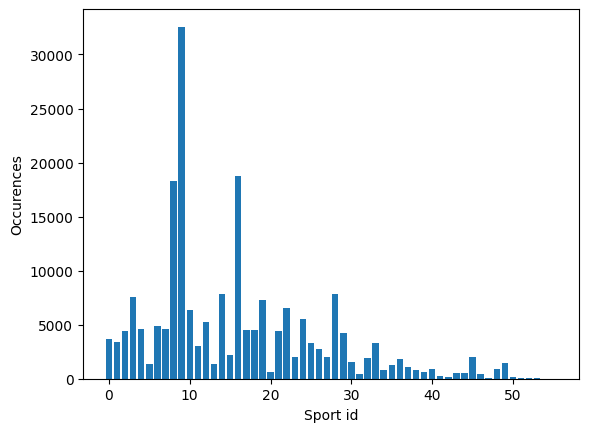

In [ ]:
import matplotlib.pyplot as plt
# Need another dictionary or list?????

x_ids = [sports_map[sport] for sport in sport_counts["Sport"]]

#for sport in sport_counts["Sport"]:
    #print(sport)
    #print(sports_map[sport])

plt.bar(x = x_ids, height = sport_counts["ID"])
plt.xlabel("Sport id")
plt.ylabel("Occurences")

plt.show()

In [ ]:
all_male = athletes[athletes["Sex"] == 'M']
print(all_male.shape)

all_female = athletes[athletes["Sex"] == 'F']
print(all_female.shape)

(196594, 15)
(74522, 15)


In [ ]:
all_male_av_height = all_male.groupby("Sport", as_index = False)["Height"].mean().dropna()
all_male_av_height


#all_male_av_height.dropna()

,Sport,Height
1,Alpine Skiing,177.891374
3,Archery,178.477842
4,Art Competitions,174.896552
5,Athletics,179.768303
6,Badminton,179.620787
7,Baseball,182.599291
8,Basketball,194.872624
10,Beach Volleyball,193.290909
11,Biathlon,178.856281
12,Bobsleigh,181.992015


<BarContainer object of 56 artists>

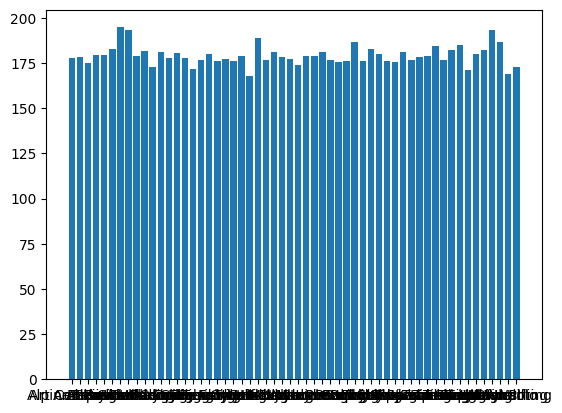

In [ ]:
plt.bar(all_male_av_height["Sport"], all_male_av_height["Height"])

In [ ]:
all_male.groupby("Sport")["Weight"].mean()

Sport
Aeronautics               NaN
Alpine Skiing       78.626035
Alpinism                  NaN
Archery             77.066866
Art Competitions    75.290909
                      ...    
Tug-Of-War          95.615385
Volleyball          86.925926
Water Polo          87.706172
Weightlifting       80.251796
Wrestling           76.400640
Name: Weight, Length: 63, dtype: float64

In [ ]:
#Values are pretty close together, I should probably use StandardScalar
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()
X_fit = scalar.fit_transform(X)
print(X_fit)

array([[-0.19250283,  0.44023088,  0.6505512 , -0.69008255],
       [-0.37488199, -0.50835767, -0.74508685, -0.69008255],
       [-0.73964031,  0.91452515,  0.79011501,  1.449102  ],
       ...,
       [ 0.35463465,  0.06079546, -0.81486875, -0.69008255],
       [ 0.90177213,  0.91452515,  1.76706164, -0.69008255],
       [ 1.63128876,  0.91452515,  1.76706164, -0.69008255]])

In [ ]:
test_models(X_fit, y_new)

C:\Users\mtkub\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 